In [55]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-06-15 20:56:57,547: Credentials are already in use. The existing account in the session will be replaced.


In [56]:
from qiskit import *

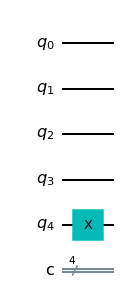

In [57]:
#We will do an example of a phase estimation algorithm. In this case the unitary 
#U has eigenvector |1> and eigenvalue $e^{2pi i/16}$ i.e $U|1> = e^{pi i/8}|1>$. 
#The goal of this protocol is to estimate $\theta = 1/16$ with high precision. 
#Note that 1/16 = 0.0001 so we will need three qubits set to zero and another 
#quabit |1> that represents our eignstate. The result we are looking for is "0001"



#We start by setting up the circuit
circ = QuantumCircuit(5,4)
#this step creates the state |1> in the fourth register
circ.x(4)
circ.draw()

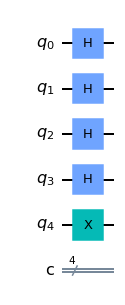

In [58]:
#Now we will apply Hadamard gates and controlled unitaries c-U, where U is precisely 
#the unitary we described above

#Let's start with the Hadamard gates
for qbit in range(4):
    circ.h(qbit)
circ.draw()

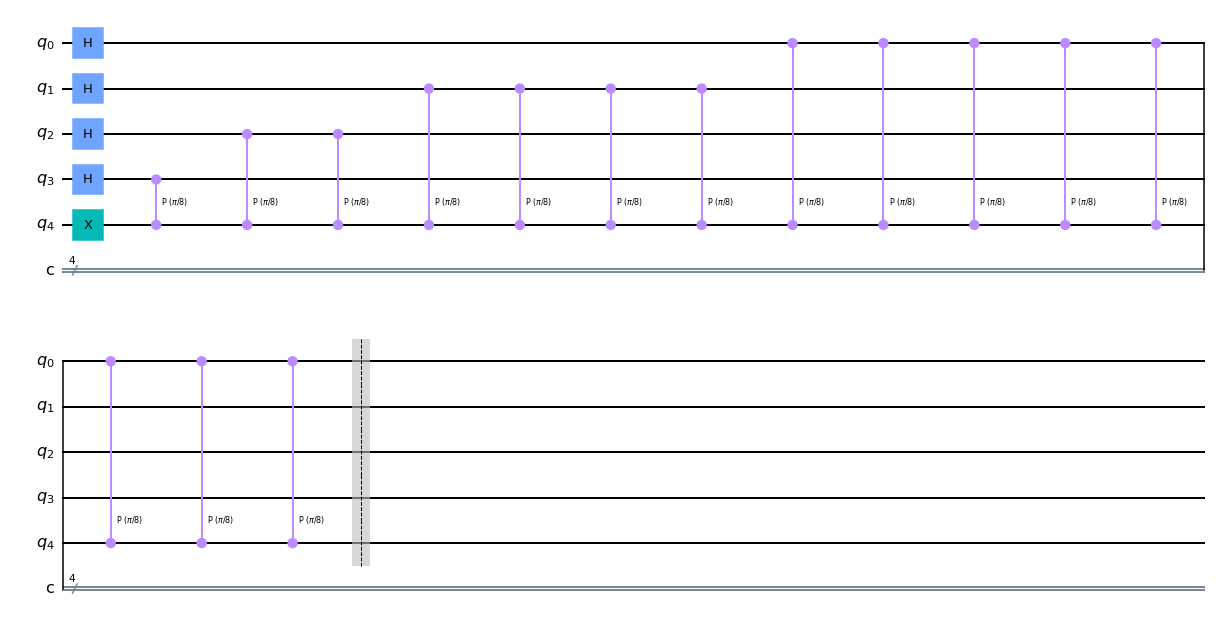

In [59]:
#Now we will need to apply controlled unitaries. Note that we do it differently
#than the Qiskit textbook. We read the qubits from top to bottom and will apply
#the algorithm that same way that a quantum computing textbook would. 
#Feel free to use any way you prefer. 

n = 1
for qubit in reversed(range(4)):
    for i in range(n):
        circ.cp(np.pi/8, qubit, 4); 
    n = n * 2
circ.barrier()
circ.draw()

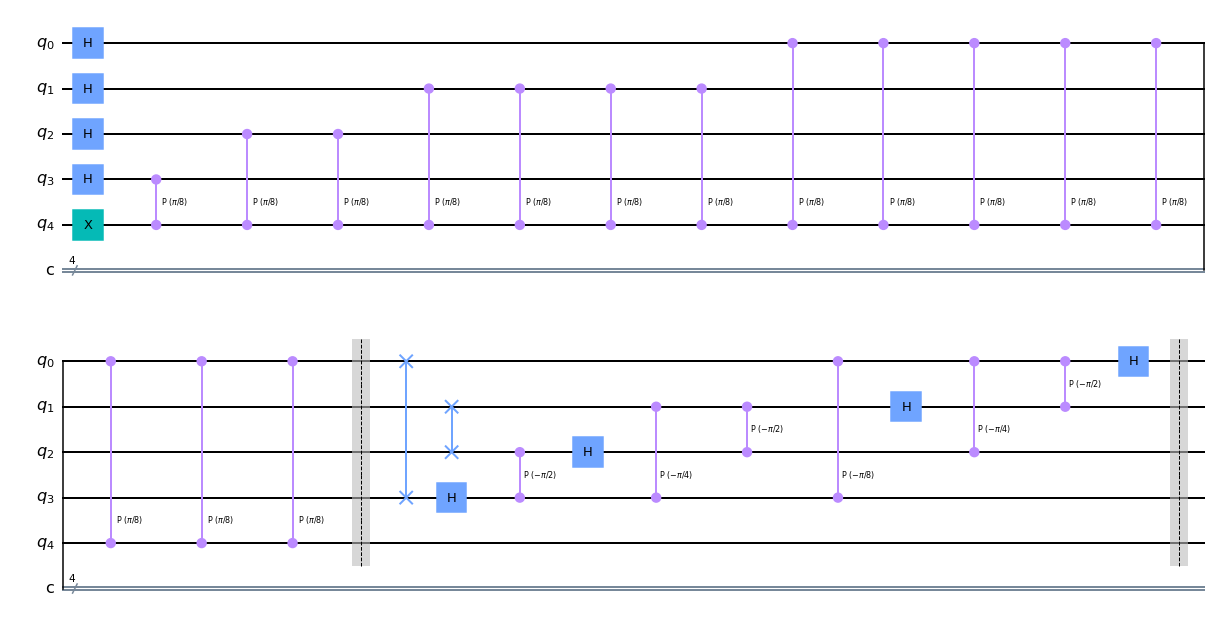

In [60]:
#Here we apply inverse Quantum Fourier Transform

circ.swap(0,3)
circ.swap(1,2)
circ.h(3)
circ.cp(-np.pi/2, 3, 2)
circ.h(2)
circ.cp(-np.pi/4, 3, 1)
circ.cp(-np.pi/2, 2, 1)
circ.h(1)
circ.cp(-np.pi/8, 3, 0)
circ.cp(-np.pi/4, 2, 0)
circ.cp(-np.pi/2, 1, 0)
circ.h(0)
circ.barrier()
circ.draw()

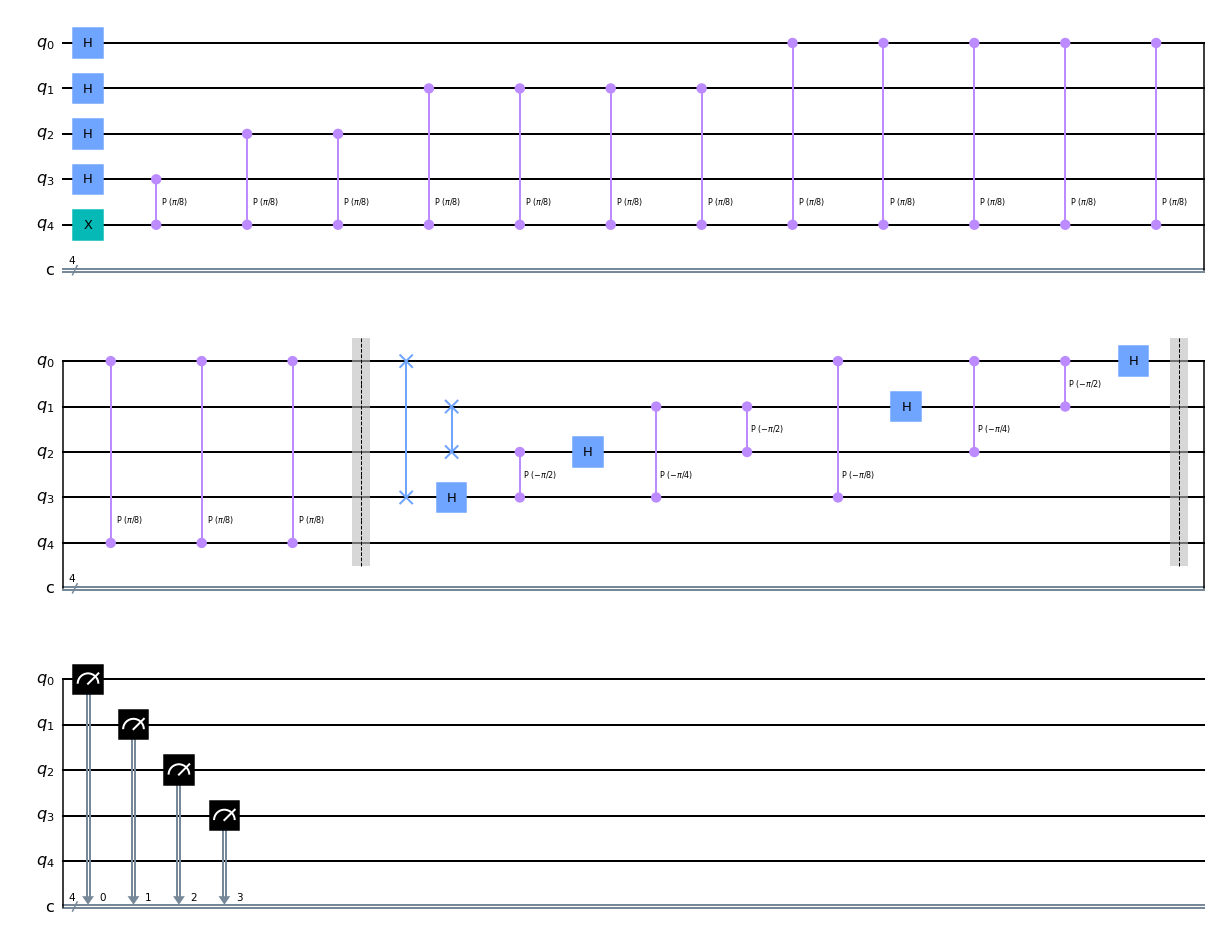

In [61]:
#Let's measure the reuslt

for i in range(4):
    circ.measure(i,i)
circ.draw()


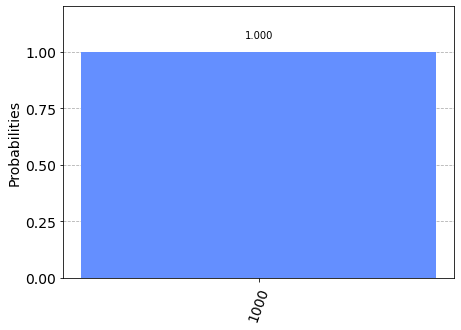

In [62]:
#Note that we read the result from top to bottom so our result is 0001, which is precisely what we are after. 
#Now this is a result using a simulator


from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
t_circ = transpile(circ, simulator)
qobj = assemble(t_circ, shots=1024)
results = simulator.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

Job Status: job has successfully run


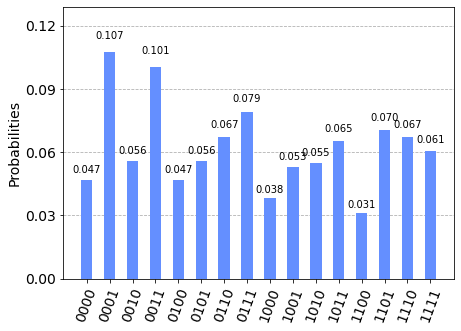

In [64]:
#Now we will see what is the result of this computation on a real device

from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_lima')


t_circ = transpile(circ, device)
qobj = assemble(circ, shots=1024)
job = execute(circ, backend = device, shots = 1024)
job_monitor(job)

device_result = job.result()

device_counts = device_result.get_counts(circ)
plot_histogram(device_counts)